In [19]:
##PCR İLE PCA-MODEL KURMA-TAHMİN-MODEL DOĞRULAMA(TUNİNG)
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()
#df.describe().T

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [20]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [21]:
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64") 
## axis=1 dropun sütünlar için uygulanacağını gösterir
## salaryı bağımlı değişken diye çıkardım
## diğer katagorileride çıkardım çünkü onlar ilk haliydi ben onları dummies ile katagorikleştirdim
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [23]:
## ilk pca yapıcaz sonra model kurcaz
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [24]:
pca = PCA()##argüman girmezsen değişken sayısı kadar bileşen olusur
X_reduced_train = pca.fit_transform(scale(X_train)) ##pca ile indirgedik
#X_reduced_train[0:1,:]

In [25]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]
"""
pca.explained_variance_ratio_:her bir ana bileşenin veri setindeki toplam varyansın ne kadarını açıkladığını ifade eder.
Bu değer, her bir ana bileşen için bir oran (yüzde değil, oran) olarak gelir.
Örneğin, explained_variance_ratio_ dizisi [0.5, 0.3, 0.1, 0.05, 0.05] gibi olabilir,
bu da ilk bileşenin varyansın %50'sini, ikinci bileşenin %30'unu vb. açıkladığı anlamına gelir.

np.round(..., decimals = 4):
np.round, bu oranları decimals=4 parametresiyle virgülden sonra dört basamak olacak şekilde yuvarlar.

np.cumsum(...): np.cumsum, verilen dizi üzerinde kümülatif toplam (cumulative sum) alır.
Bu, her adımda önceki bileşenlerin açıklanan varyans oranlarını toplar. Örneğin, [50, 30, 10] gibi bir dizi için kümülatif toplam [50, 80, 90] olur.
Bu adım, her bir bileşen eklendikçe ne kadar toplam varyansın açıklandığını gösterir.
yani ilk bileşenin açıkladıpı varyans 38iken ikinci bileşenin birinci bileşen ile açıkladığı varyans 60 olmuş
"""

"\npca.explained_variance_ratio_:her bir ana bileşenin veri setindeki toplam varyansın ne kadarını açıkladığını ifade eder.\nBu değer, her bir ana bileşen için bir oran (yüzde değil, oran) olarak gelir.\nÖrneğin, explained_variance_ratio_ dizisi [0.5, 0.3, 0.1, 0.05, 0.05] gibi olabilir,\nbu da ilk bileşenin varyansın %50'sini, ikinci bileşenin %30'unu vb. açıkladığı anlamına gelir.\n\nnp.round(..., decimals = 4):\nnp.round, bu oranları decimals=4 parametresiyle virgülden sonra dört basamak olacak şekilde yuvarlar.\n\nnp.cumsum(...): np.cumsum, verilen dizi üzerinde kümülatif toplam (cumulative sum) alır.\nBu, her adımda önceki bileşenlerin açıklanan varyans oranlarını toplar. Örneğin, [50, 30, 10] gibi bir dizi için kümülatif toplam [50, 80, 90] olur.\nBu adım, her bir bileşen eklendikçe ne kadar toplam varyansın açıklandığını gösterir.\nyani ilk bileşenin açıkladıpı varyans 38iken ikinci bileşenin birinci bileşen ile açıkladığı varyans 60 olmuş\n"

In [26]:
#pca yaptık model kurucaz
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [27]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [28]:
pcr_model.intercept_
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [29]:
## TAHMİN

In [33]:
y_pred1 = pcr_model.predict(X_reduced_train)
y_pred1[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
#train hataları
np.sqrt(mean_squared_error(y_train, y_pred1))
r2_score(y_train, y_pred1)

0.5770075250410179

In [39]:
pca2 = PCA()  ##birde test için yapıcam

In [40]:
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred2 = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred2))
#(y_test, y_pred2)

405.15753641499634

In [41]:
##pcr model tuning

In [42]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))
##bir bileşen değil de birden fazla bileşenle test ettik

390.7914255682224


In [43]:
from sklearn import model_selection

In [55]:
## k fold cross validation yöntemi
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)
"""
Veri setini K sayıda alt kümeye böler.
Model her defasında farklı bir alt kümeyi test verisi olarak kullanır ve kalan K-1 kümeyi modelin eğitimi için kullanır. 
Bu işlem K kez tekrar edilir ve her bir adımda modelin performansı hesaplanır.
Sonuç olarak, modelin genel performansını değerlendirmek için bu K sayıda sonuç ortalanır.
n_splits = 10: Veri setini kaç parçaya böleceğinizi belirtir. Burada, veri seti 10 eşit parçaya (fold'a) bölünecektir
shuffle = True: Bu parametre, veri setinin bölünmeden önce karıştırılmasını sağlar. 
Bu, özellikle veri setinin sıralı olduğu durumlarda önemlidir, çünkü sıralı verilerde belirli desenler olabilir
ve bu da modelin performansını olumsuz etkileyebilir.
random_state = 1: Karıştırma işleminin her seferinde aynı sonuçları üretmesini sağlamak için kullanılan bir sabit değerdir.
Bu parametreyi belirlemek, modelin tekrarlanabilirliğini sağlar, yani farklı zamanlarda aynı kodu çalıştırdığınızda aynı sonuçları alırsınız.
"""

"\nVeri setini K sayıda alt kümeye böler.\nModel her defasında farklı bir alt kümeyi test verisi olarak kullanır ve kalan K-1 kümeyi modelin eğitimi için kullanır. \nBu işlem K kez tekrar edilir ve her bir adımda modelin performansı hesaplanır.\nSonuç olarak, modelin genel performansını değerlendirmek için bu K sayıda sonuç ortalanır.\nn_splits = 10: Veri setini kaç parçaya böleceğinizi belirtir. Burada, veri seti 10 eşit parçaya (fold'a) bölünecektir\nshuffle = True: Bu parametre, veri setinin bölünmeden önce karıştırılmasını sağlar. \nBu, özellikle veri setinin sıralı olduğu durumlarda önemlidir, çünkü sıralı verilerde belirli desenler olabilir\nve bu da modelin performansını olumsuz etkileyebilir.\nrandom_state = 1: Karıştırma işleminin her seferinde aynı sonuçları üretmesini sağlamak için kullanılan bir sabit değerdir.\nBu parametreyi belirlemek, modelin tekrarlanabilirliğini sağlar, yani farklı zamanlarda aynı kodu çalıştırdığınızda aynı sonuçları alırsınız.\n"

In [45]:
lm = LinearRegression()
RMSE = []

In [46]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
## her bir bileşen sayısı için model kurup, her bileşesen sayısı için k fold cross yapıp hataları hesaplıyor 
##sonra hangi bileşen için daha az hata alırız onu bulmuş oluruz
"""
y_train.ravel(): y_train etiketlerinin (label) düzleştirilmiş bir kopyasını alır.
Bu, hedef değişkenin (dependent variable) boyutunun uygun hale getirilmesi içindir.
Kodun X_reduced_train ve y_train üzerinde çalışmasının sebebi,
modelin X_reduced_train veri setindeki özellikler (features) ile y_train etiketleri (labels) arasında nasıl bir ilişki kurduğunu ölçmek ve değerlendirmektir. Şimdi, neden bu veri setlerinin kullanıldığına ve kodun amacına daha ayrıntılı bakalım:
2. y_train:
y_train, bağımlı değişkenleri veya hedef değişkenleri (target variables) temsil eder. Bu, modelin tahmin etmeye çalıştığı çıktıdır.
y_train.ravel() ifadesi, y_train verisini bir boyutlu hale getirir. Bu, bazı modelleme fonksiyonlarının beklentilerine uygun bir format sağlar.
"""

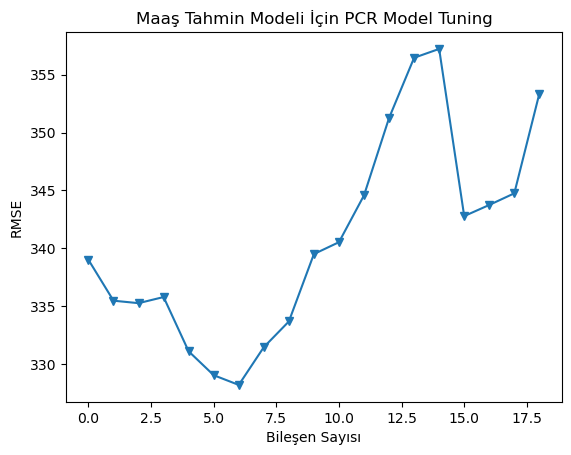

In [49]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [50]:
lm = LinearRegression()

In [60]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [57]:
##train için baktım
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.82659830945005


In [61]:
##test için baktım
y_pred = pcr_model.predict(X_reduced_test[:,0:6])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


In [ ]:
## beklenti tune edildikten sonrakı test hatası ile edildikten önceki test hatasından daha küçük çıkmalı